## Setup

In [24]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 10000000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

## Downloading the data

In [2]:
file_path = "https://opendata.ecdc.europa.eu/covid19/casedistribution/csv"

In [6]:
df = pd.read_csv(file_path)

In [7]:
df.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,19/09/2020,19,9,2020,47,1,Afghanistan,AF,AFG,38041757.0,Asia,1.616645
1,18/09/2020,18,9,2020,0,0,Afghanistan,AF,AFG,38041757.0,Asia,1.535155
2,17/09/2020,17,9,2020,17,0,Afghanistan,AF,AFG,38041757.0,Asia,1.653446
3,16/09/2020,16,9,2020,40,10,Afghanistan,AF,AFG,38041757.0,Asia,1.708649
4,15/09/2020,15,9,2020,99,6,Afghanistan,AF,AFG,38041757.0,Asia,1.627159


In [8]:
df.columns

Index(['dateRep', 'day', 'month', 'year', 'cases', 'deaths',
       'countriesAndTerritories', 'geoId', 'countryterritoryCode',
       'popData2019', 'continentExp',
       'Cumulative_number_for_14_days_of_COVID-19_cases_per_100000'],
      dtype='object')

In [9]:
df.shape

(43718, 12)

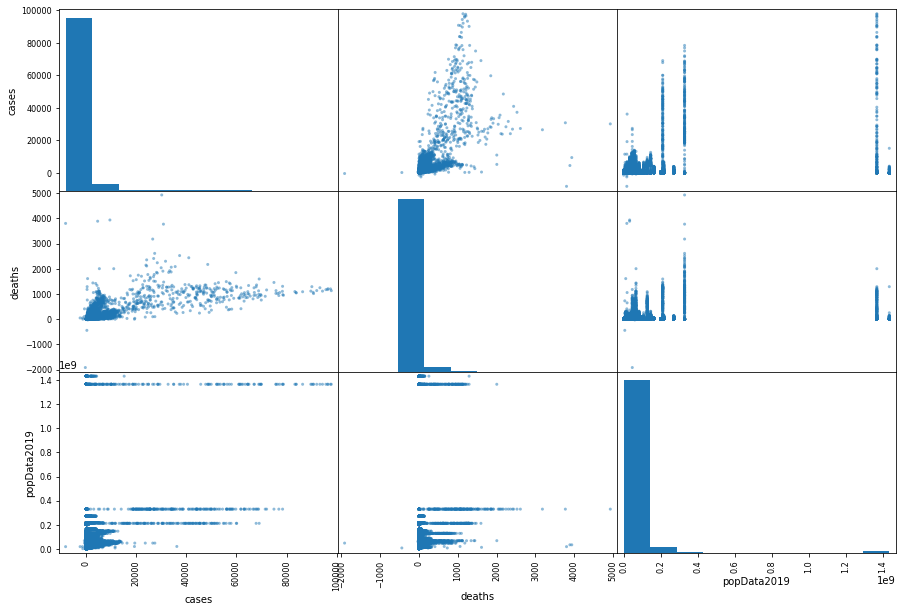

In [33]:
from pandas.plotting import scatter_matrix
attributes = [ "cases", "deaths", "popData2019" ]
scatter_matrix(df[attributes], figsize=(15,10));

## Feature Engineering:

In [36]:
df_new = df.copy()
# Rescale the population to be in terms of millions
df_new["pop_in_millions"] = df_new["popData2019"]/(10**6)
# Calculate the number of Covid cases per every million of pupulation
df_new["cases_per_million"] = df_new["cases"]/df_new["pop_in_millions"]
# Calculate death rates per million
df_new["deaths_per_million"] =  df_new["deaths"] / df_new["pop_in_millions"]
df_new.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000,pop_in_millions,cases_per_million,deaths_per_million
0,19/09/2020,19,9,2020,47,1,Afghanistan,AF,AFG,38041757.0,Asia,1.616645,38.041757,1.235484,0.026287
1,18/09/2020,18,9,2020,0,0,Afghanistan,AF,AFG,38041757.0,Asia,1.535155,38.041757,0.000000,0.000000
2,17/09/2020,17,9,2020,17,0,Afghanistan,AF,AFG,38041757.0,Asia,1.653446,38.041757,0.446877,0.000000
3,16/09/2020,16,9,2020,40,10,Afghanistan,AF,AFG,38041757.0,Asia,1.708649,38.041757,1.051476,0.262869
4,15/09/2020,15,9,2020,99,6,Afghanistan,AF,AFG,38041757.0,Asia,1.627159,38.041757,2.602403,0.157721


### Rescaling Values
Since there is a huge variation in the number of cases per day, I am going to normalize the scores to be between 0 and 1 using Scikit-learn's MinMax Scaler

In [37]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:


pop = 38041757.0

In [27]:
pop_mil = pop/(10**6)

In [28]:
pop_mil

38.041757

In [29]:
cases_per_day = 40

In [30]:
print(cases_per_day/pop_mil)

1.05147614501612


In [3]:
columns = ['date_reported', 'day', 'month','year','cases','deaths','country/territory','geo_id',
          'pop_data_2019', 'continent','cm_no_14_days']